ID: 190041220

Name: Tasfia Tasneem Annesha

In [51]:
import cv2

import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.color
import skimage.filters
from scipy import signal
import random

#Task 1

**Task # 01 (Histogram Equalization)**
Apply the Global HE technique on color images.
* Do the HE results become same for both RGB and HSI models?

In [52]:
def display_rgb(image):
    rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.show()

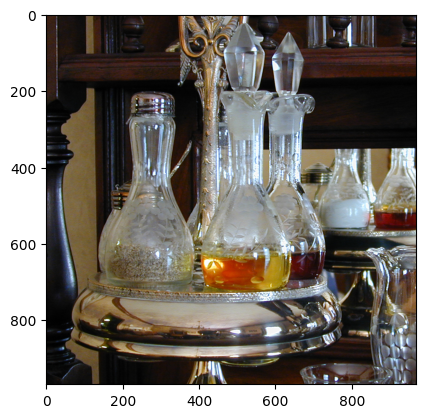

In [53]:
image = cv2.imread('/content/Fig0637(a)(caster_stand_original).tif')
display_rgb(image)

##Applying histogram equalization in HSI model

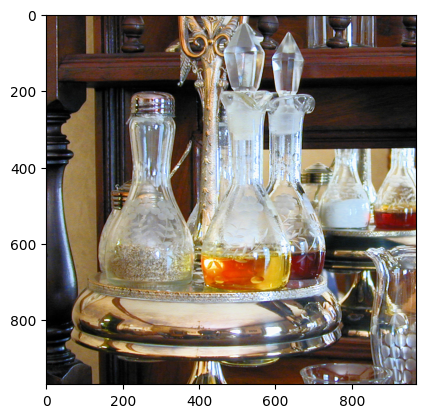

In [54]:

image_hsi = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, i = cv2.split(image_hsi)
i_equalized = cv2.equalizeHist(i)

image_hsi_equalized = cv2.merge([h, s, i_equalized])

equalized_image_bgr = cv2.cvtColor(image_hsi_equalized, cv2.COLOR_HSV2BGR)
display_rgb(equalized_image_bgr)





## Applying histogram equalization to each RGB channel for comparison

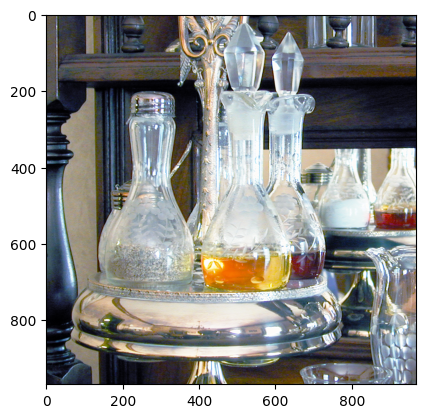

In [55]:

r, g, b = cv2.split(image)
r_equalized = cv2.equalizeHist(r)
g_equalized = cv2.equalizeHist(g)
b_equalized = cv2.equalizeHist(b)
equalized_image_rgb = cv2.merge([r_equalized, g_equalized, b_equalized])

display_rgb(equalized_image_rgb)


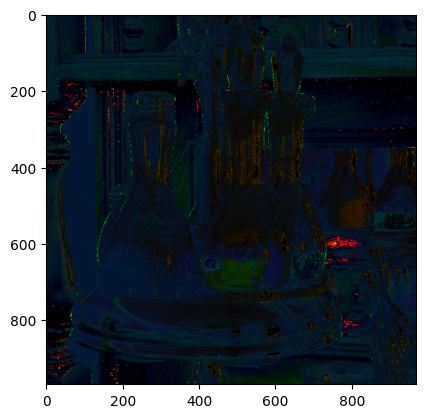

In [56]:
diff= equalized_image_rgb-equalized_image_bgr
display_rgb(diff)

The images look almost similar after applying HE. There is a slight difference since in RGB the HE operation changes the colour by a very slight margin. But the images look almost the same to the human eye.

#Task 2

**Task 2: a.Smoothing a colour Image**

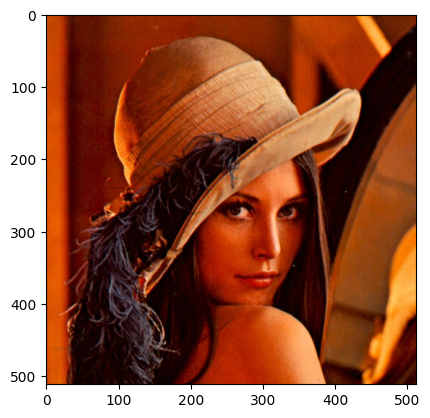

In [57]:
import cv2
import numpy as np

# Load your color image
image = cv2.imread('/content/Fig0646(a)(lenna_original_RGB).tif')
display_rgb(image)





### a. Smoothing Filter (Gaussian Blur) in RGB Model

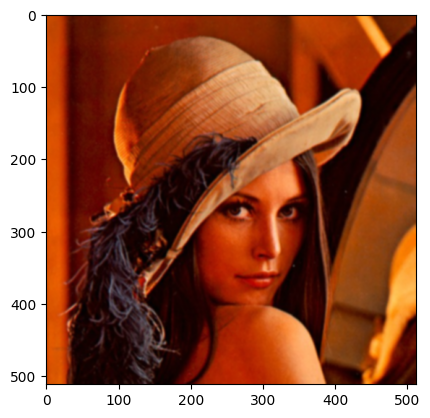

In [58]:

smoothed_image_rgb = cv2.GaussianBlur(image, (5, 5), 0)

display_rgb(smoothed_image_rgb)


### b. Sharpening Operation in HSI Model

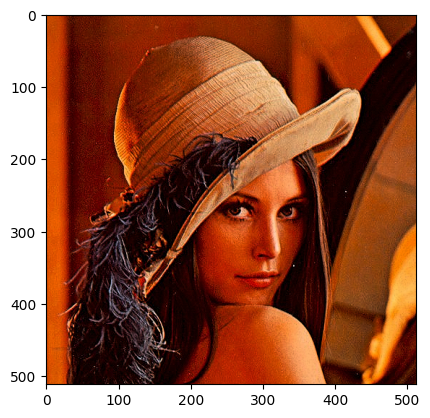

In [59]:
image_hsi = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


h, s, i = cv2.split(image_hsi)


sharpened_i = cv2.filter2D(i, -1, np.array([[0, -1, 0],
                                           [-1, 5, -1],
                                           [0, -1, 0]]))


image_hsi_sharpened = cv2.merge([h, s, sharpened_i])


sharpened_image_bgr = cv2.cvtColor(image_hsi_sharpened, cv2.COLOR_HSV2BGR)


display_rgb(sharpened_image_bgr)

#Task 3

Task # 03 (Non-Linear Filter)
Add 'salt & pepper' noise to individual channels of an image (you can use any built-in function or design your own function).
Apply the median filter on color images to the reduce noise.
Write your observations from the outputs.

In [60]:
def add_sp_noise(img):
    row , col = img.shape

    number_of_pixels = random.randint(500, 1000)
    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        img[y_coord][x_coord] = 255

    number_of_pixels = random.randint(500, 1000)
    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        img[y_coord][x_coord] = 0

    return img

In [61]:
def median_filter(img, window=3):

    h, w = img.shape
    pad_width = (window-1)//2
    out = np.zeros(img.shape)
    img_pad = np.pad(img, pad_width=pad_width)
    x, y = 0, 0

    for i in range(h + (2*pad_width) - window):
        y = 0
        for j in range(w + (2*pad_width) - window):
            out[x, y] = np.median(img_pad[i:i+window, j:j+window])
            y = y + 1
        x = x + 1

    return out

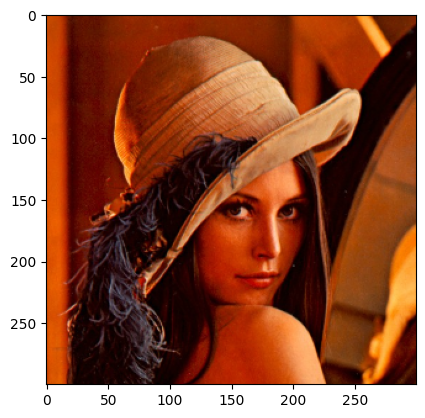

In [62]:
image = cv2.imread('/content/Fig0646(a)(lenna_original_RGB).tif') # BGR Image
image = cv2.resize(image, (300, 300))
display_rgb(image)

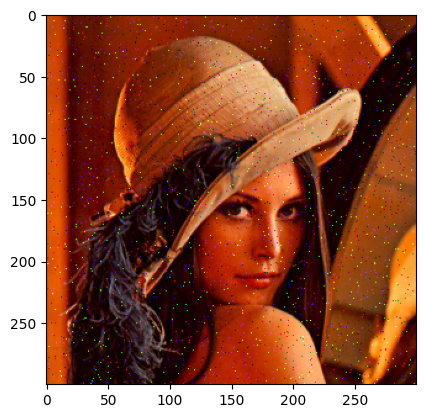

In [63]:
image_noisy = image.copy()
image_noisy[:, :, 0] = add_sp_noise(image[:, :, 0])
image_noisy[:, :, 1] = add_sp_noise(image[:, :, 1])
image_noisy[:, :, 2] = add_sp_noise(image[:, :, 2])
display_rgb(image_noisy)

RGB denoising

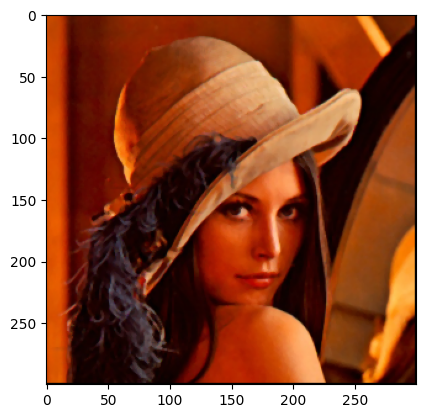

In [64]:
image_denoised = image_noisy.copy()
image_denoised[:, :, 0] = median_filter(image_noisy[:, :, 0])
image_denoised[:, :, 1] = median_filter(image_noisy[:, :, 1])
image_denoised[:, :, 2] = median_filter(image_noisy[:, :, 2])
display_rgb(image_denoised)

Hsv denoising

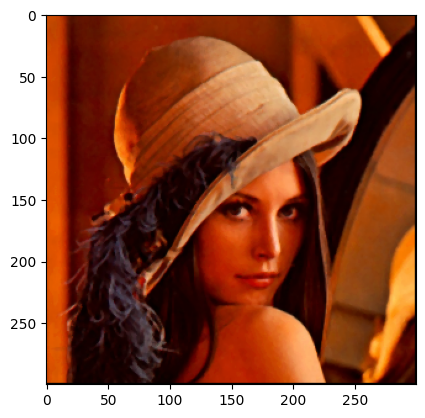

In [65]:
hsv_noisy = cv2.cvtColor(image_noisy, cv2.COLOR_RGB2HSV)
hsv_noisy[:, :, 0] = median_filter(hsv_noisy[:, :, 0])
hsv_noisy[:, :, 1] = median_filter(hsv_noisy[:, :, 1])
hsv_noisy[:, :, 2] = median_filter(hsv_noisy[:, :, 2])
display_rgb(cv2.cvtColor(hsv_noisy, cv2.COLOR_HSV2RGB))